In [2]:
import os, sys
import pandas as pd

%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# 赛题分析

https://www.kaggle.com/c/titanic

- 赛题背景是什么？赛题标签是什么？赛题是解决什么问题？
- 赛题有什么数据，数据是结构化数据还是非结构化数据？
- 赛题是分类问题还是回归问题？

https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 数据分析

## 数据字段含义

https://www.kaggle.com/c/titanic/data

- PassengerId
- Survived
- Pclass
- sex
- Age
- sibsp
- parch
- ticket
- fare
- cabin
- embarked

## 数据字段分析

In [39]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def columns_analysis(column=list(df_train.columns), 
                 plot_type=['counts', 'his', 'pie', 'kde']):
    if plot_type == 'counts':
        print(df_train[column].value_counts())
    elif plot_type == 'his':
        if df_train[column].dtype == 'object':
            return
        df_train[column].hist()
    elif plot_type == 'pie':
        idx_counts = df_train[column].value_counts()
        plt.pie(idx_counts, labels=idx_counts.index)
    elif plot_type == 'kde':
        if df_train[column].dtype == 'object':
            return
        sns.distplot(df_train[df_train['Survived']==0][column].dropna())
        sns.distplot(df_train[df_train['Survived']==1][column].dropna())
        plt.legend(['Not Survived', 'Survived'])

interactive(children=(Dropdown(description='column', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'Se…

## 字段关联分析

热力图：
- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
- https://nbviewer.jupyter.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb

[Text(0.5, 0, 'PassengerId'),
 Text(1.5, 0, 'Survived'),
 Text(2.5, 0, 'Pclass'),
 Text(3.5, 0, 'Age'),
 Text(4.5, 0, 'SibSp'),
 Text(5.5, 0, 'Parch'),
 Text(6.5, 0, 'Fare')]

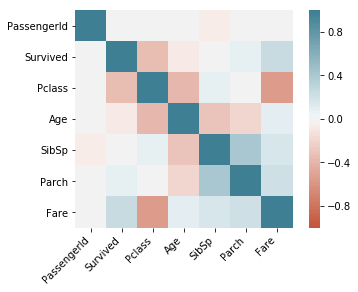

In [11]:
corr_mat = df_train.corr()

ax = sns.heatmap(
    corr_mat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [40]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def correlations(column1=list(df_train.select_dtypes('number').columns), 
                 column2=list(df_train.select_dtypes('number').columns)):
    print("Correlation:", df_train[column1].corr(df_train[column2]))

interactive(children=(Dropdown(description='column1', options=('PassengerId', 'Survived', 'Pclass', 'Age', 'Si…

In [32]:
@interact
def scatter_plot(x=list(df_train.columns), 
                 y=list(df_train.columns)[1:],
                 plot_type=['scatter', 'violin']):
    if plot_type == 'scatter':    
        plt.scatter(x=df_train[x], y=df_train[y])
        plt.title(y.title() + ' vs ' +x.title())
        plt.xlabel(x.title()); plt.ylabel(y.title())
    elif plot_type == 'violin':   
        sns.violinplot(data=df_train,x=x, y=y)


interactive(children=(Dropdown(description='x', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', '…

# 其他kernel
- https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python